<a href="https://colab.research.google.com/github/DScientistSagar/Sagar_DataScientist/blob/main/upload__cleaning_mitali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from gensim.models import Word2Vec

In [2]:

data_train=pd.read_csv('/content/train.csv')
data_test=pd.read_csv('/content/test.csv')

In [3]:
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
data_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
data_train['has_location'] = pd.notna(data_train['location']).astype(int)

data_test['has_location'] = pd.notna(data_test['location']).astype(int)

In [6]:
data_train.drop(['location'], axis=1, inplace=True)

data_test.drop(['location'], axis=1, inplace=True)

In [7]:
data_train['keyword'].fillna('unknown', inplace=True)

label_encoder = LabelEncoder()
data_train['keyword_encoded'] = label_encoder.fit_transform(data_train['keyword'])

data_train.drop('keyword', axis=1, inplace=True)

<ipython-input-7-15acab15a5b1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['keyword'].fillna('unknown', inplace=True)


In [8]:
data_test['keyword'].fillna('unknown', inplace=True)

label_encoder = LabelEncoder()
data_test['keyword_encoded'] = label_encoder.fit_transform(data_test['keyword'])

data_test.drop('keyword', axis=1, inplace=True)

<ipython-input-8-7ad05f4e3b60>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['keyword'].fillna('unknown', inplace=True)


In [9]:
data_train.head()

,id,text,target,has_location,keyword_encoded
0,1,Our Deeds are the Reason of this #earthquake M...,1,0,206
1,4,Forest fire near La Ronge Sask. Canada,1,0,206
2,5,All residents asked to 'shelter in place' are ...,1,0,206
3,6,"13,000 people receive #wildfires evacuation or...",1,0,206
4,7,Just got sent this photo from Ruby #Alaska as ...,1,0,206


In [ ]:
data_test.head()

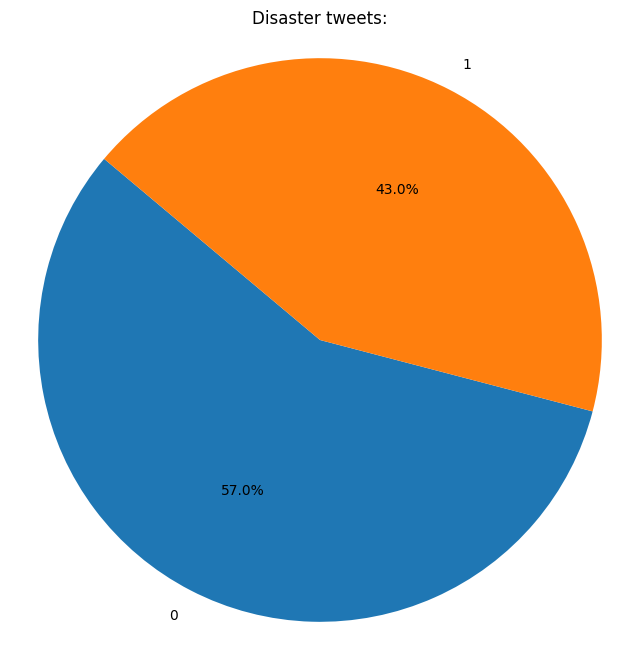

In [11]:
category_counts = data_train['target'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Disaster tweets:')
plt.axis('equal')
plt.show()